In [26]:
from numpy import loadtxt
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor
% pylab inline

# load pima-indians-diabetes data, it's a binary classification task
#dataset = loadtxt("data.txt", delimiter=",")
train = pd.read_csv('encoded_feature.csv') # read train data
feature = pd.read_csv('weekday.csv')
train_feature = feature.iloc[:,0]
test_feature = pd.read_csv('weekend.csv')
train_set = pd.concat([train,train_feature],axis=1)
test_set = pd.concat([train,test_feature],axis=1).iloc[:,:-1]
train_label = feature.iloc[:,1]
test_label = test_feature.iloc[:,-1]

Populating the interactive namespace from numpy and matplotlib


In [27]:
train_set.head()

,USER_ID,F,M,南投縣,嘉義市,嘉義縣,基隆市,宜蘭縣,屏東縣,彰化縣,...,age,tenure,device,brand,brand_model,avg_usage,call_out_usage,call_in_usage,data_usage,2018-03-05
0,1,0,1,0,0,0,0,0,0,0,...,1,4,2,7,2,2,10,11,4,0.015337
1,2,1,0,0,0,0,0,0,0,0,...,11,5,2,16,141,2,6,7,4,0.210862
2,3,1,0,0,0,0,0,1,0,0,...,3,3,2,7,34,2,5,2,6,0.086174
3,4,0,1,0,0,0,0,0,0,0,...,4,2,2,2,225,8,10,11,8,0.317932
4,6,1,0,0,0,1,0,0,0,0,...,1,3,2,2,224,8,7,2,10,0.193441


In [49]:
# split our data into train & test
X_train_weekday, X_test_weekday, y_train_weekday, y_test_weekday = train_test_split(train_set, train_label, random_state = 7, test_size = 0.5)
X_train_weekend, X_test_weekend, y_train_weekend, y_test_weekend = train_test_split(test_set, test_label, random_state = 7, test_size = 0.5)

In [48]:
# eval_metrics can selecy rmse, logloss, error, auc, merror, mlogloss or custom define
eval_set =  [(X_test_weekday, y_test_weekday)]
model_weekday = XGBRegressor(n_estimators=2000, max_depth=5, learning_rate=0.01)
# model = MultiOutputRegressor(model)
model_weekday.fit(X_train_weekday, y_train_weekday,early_stopping_rounds=200, eval_metric="rmse", eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:0.463168
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:0.460092
[2]	validation_0-rmse:0.457064
[3]	validation_0-rmse:0.45408
[4]	validation_0-rmse:0.451139
[5]	validation_0-rmse:0.448242
[6]	validation_0-rmse:0.445393
[7]	validation_0-rmse:0.442675
[8]	validation_0-rmse:0.440006
[9]	validation_0-rmse:0.437374
[10]	validation_0-rmse:0.434686
[11]	validation_0-rmse:0.432132
[12]	validation_0-rmse:0.429628
[13]	validation_0-rmse:0.427049
[14]	validation_0-rmse:0.424611
[15]	validation_0-rmse:0.422232
[16]	validation_0-rmse:0.419764
[17]	validation_0-rmse:0.417457
[18]	validation_0-rmse:0.415174
[19]	validation_0-rmse:0.412828
[20]	validation_0-rmse:0.410622
[21]	validation_0-rmse:0.408462
[22]	validation_0-rmse:0.406216
[23]	validation_0-rmse:0.404122
[24]	validation_0-rmse:0.402018
[25]	validation_0-rmse:0.399949
[26]	validation_0-rmse:0.397921
[27]	validation_0-rmse:0.395917
[28]	validation_0-rmse:0.39394
[29]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=2000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [6]:
# eval_metrics can selecy rmse, logloss, error, auc, merror, mlogloss or custom define
eval_set =  [(X_test_weekend, y_test_weekend)]
model_weekend = XGBRegressor(n_estimators=2000, max_depth=12, learning_rate=0.01)
# model = MultiOutputRegressor(model)
model_weekend.fit(X_train_weekend, y_train_weekend,early_stopping_rounds=200, eval_metric="rmse", eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:0.414676
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:0.410759
[2]	validation_0-rmse:0.406883
[3]	validation_0-rmse:0.403039
[4]	validation_0-rmse:0.39923
[5]	validation_0-rmse:0.395462
[6]	validation_0-rmse:0.391742
[7]	validation_0-rmse:0.388052
[8]	validation_0-rmse:0.384409
[9]	validation_0-rmse:0.380795
[10]	validation_0-rmse:0.377224
[11]	validation_0-rmse:0.3737
[12]	validation_0-rmse:0.370203
[13]	validation_0-rmse:0.366747
[14]	validation_0-rmse:0.363325
[15]	validation_0-rmse:0.359937
[16]	validation_0-rmse:0.356582
[17]	validation_0-rmse:0.353268
[18]	validation_0-rmse:0.349984
[19]	validation_0-rmse:0.346734
[20]	validation_0-rmse:0.343499
[21]	validation_0-rmse:0.340332
[22]	validation_0-rmse:0.337165
[23]	validation_0-rmse:0.334053
[24]	validation_0-rmse:0.330952
[25]	validation_0-rmse:0.327907
[26]	validation_0-rmse:0.32487
[27]	validation_0-rmse:0.321896
[28]	validation_0-rmse:0.318926
[29]	validation_0-rm

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=12, min_child_weight=1, missing=None, n_estimators=2000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [7]:
#training recheck
y_pred = model_weekday.predict(train_set)
y_pred_1 = model_weekend.predict(test_set)

In [23]:
y_pred_final = abs(y_pred+y_pred_1)/2

In [24]:
#predict
submission = pd.read_csv('/data/examples/ibmxfet/testing.csv')
submission['y']=y_pred_final
submission.head()

,USER_ID,date,y
0,1,2018-03-16,0.162269
1,2,2018-03-16,0.091838
2,3,2018-03-16,0.109247
3,4,2018-03-16,0.127915
4,6,2018-03-16,0.245249


In [25]:
#匯出
submission.to_csv('submission.csv',index=False)

In [20]:
# we can show the feature importances for our features
print(model_weekday.feature_importances_)
print(model_weekend.feature_importances_)

[ 0.11527289  0.00838459  0.          0.00375903  0.00285589  0.00328305
  0.00191613  0.00278266  0.0049917   0.00537005  0.01252197  0.00270943
  0.00234329  0.00712751  0.          0.00400312  0.00589484  0.00469879
  0.00162322  0.00192833  0.00317321  0.          0.00084212  0.00881176
  0.00579721  0.          0.00728617  0.          0.00527241  0.
  0.00296573  0.          0.00490627  0.          0.02760691  0.02996241
  0.01322984  0.00067126  0.01479203  0.03793205  0.01809949  0.02132152
  0.02137034  0.0147066   0.07753613  0.07560779  0.06976177  0.07985501
  0.06120631  0.06610037  0.06763816  0.07208065]
[  1.25160933e-01   1.12077752e-02   0.00000000e+00   2.27727718e-03
   9.15376062e-04   2.78333877e-03   4.29408113e-03   2.62705493e-03
   4.60664881e-03   4.45036497e-03   1.01658842e-02   2.38890829e-03
   2.24750885e-03   9.47376993e-03   0.00000000e+00   7.11463019e-03
   7.66534451e-03   1.01584420e-02   1.08654401e-03   3.38614732e-03
   4.10058722e-03   2.9768327

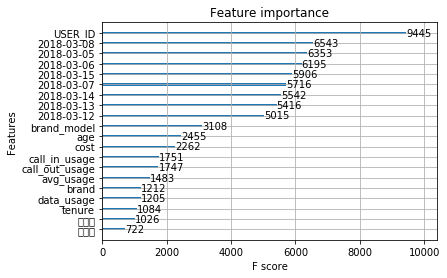

In [21]:
# import the plot_importance function to visualize the feature importance
from xgboost import plot_importance
plot_importance(model_weekday, max_num_features=20)
plt.show()

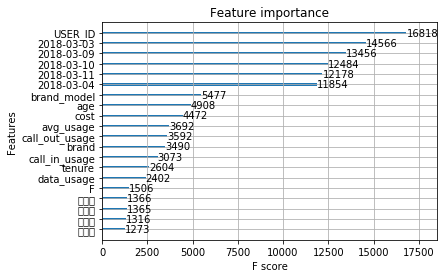

In [22]:
# import the plot_importance function to visualize the feature importance
from xgboost import plot_importance
plot_importance(model_weekend, max_num_features=20)
plt.show()